Hola **Carlos**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst, siempre debes cuidar la presentación de tus notebooks. Siempre incluye en una celda Markdown un título y una breve introducción al proyecto, para poner un título se hace de la siguiente manera: `# Título` con el `#` y el espacio después del mismo 
</div>

In [1]:
import pandas as pd
import numpy as np
# 1. Cargar los datos
games = pd.read_csv('/datasets/games.csv')

# 2. Vista previa de los primeros registros
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
print("Información del dataset:")
games.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Renombrar las columnas a minusculas
games.columns = games.columns.str.lower()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho el ajuste del nombre de las columnas, trabajar con columnas en snake_case te permite seguir los estándares de Python y acceder de mejor manera a los datos
</div>

In [4]:
# Convierte el año de lanzamiento a entero
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Convierte el user_score: reemplazar 'tbd' por NaN y luego a float
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [5]:
games.isna().mean().sort_values(ascending=False)

user_score         0.545917
critic_score       0.513192
rating             0.404786
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

In [6]:
# Eliminamos registros con nombre o plataforma faltante (críticos para análisis)
games = games.dropna(subset=['name', 'platform', 'genre'])


In [7]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
print("Información del dataset:")
games.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [9]:
#Suma de las ventas de todas las regiones
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Imprimir las primeras filas para confirmar
print(games[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())


                       name platform  na_sales  eu_sales  jp_sales  \
0                Wii Sports      Wii     41.36     28.96      3.77   
1         Super Mario Bros.      NES     29.08      3.58      6.81   
2            Mario Kart Wii      Wii     15.68     12.76      3.79   
3         Wii Sports Resort      Wii     15.61     10.93      3.28   
4  Pokemon Red/Pokemon Blue       GB     11.27      8.89     10.22   

   other_sales  total_sales  
0         8.45        82.54  
1         0.77        40.24  
2         3.29        35.52  
3         2.95        32.77  
4         1.00        31.38  


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


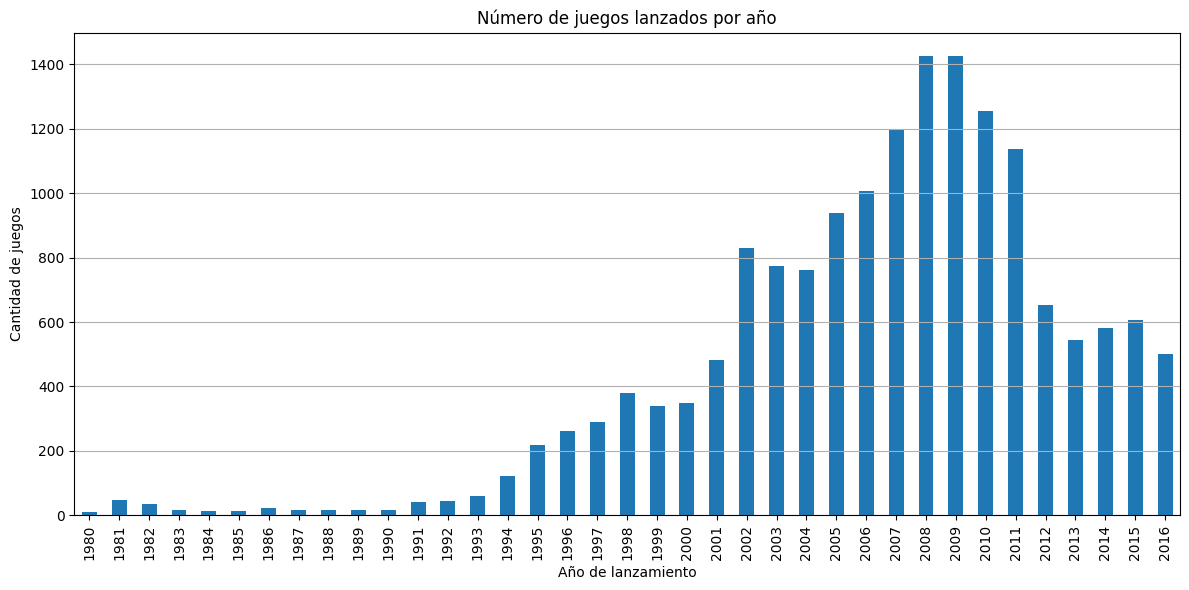

In [10]:
import matplotlib.pyplot as plt

# Contar cuántos juegos se lanzaron por año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Mostrar resultados
print(games_per_year)

# Visualizarlo
plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [11]:
#los datos más significativos comienzan en 2000 y especialmente desde 2006 hasta 2015.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Sin embargo, sería mejor mostrar una gráfica de líneas para poder analizar esto de mejor manera y poder identificar tendencias conforme pasa el tiempo
</div>

Top 10 plataformas por ventas totales:
 platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


<Figure size 1600x800 with 0 Axes>

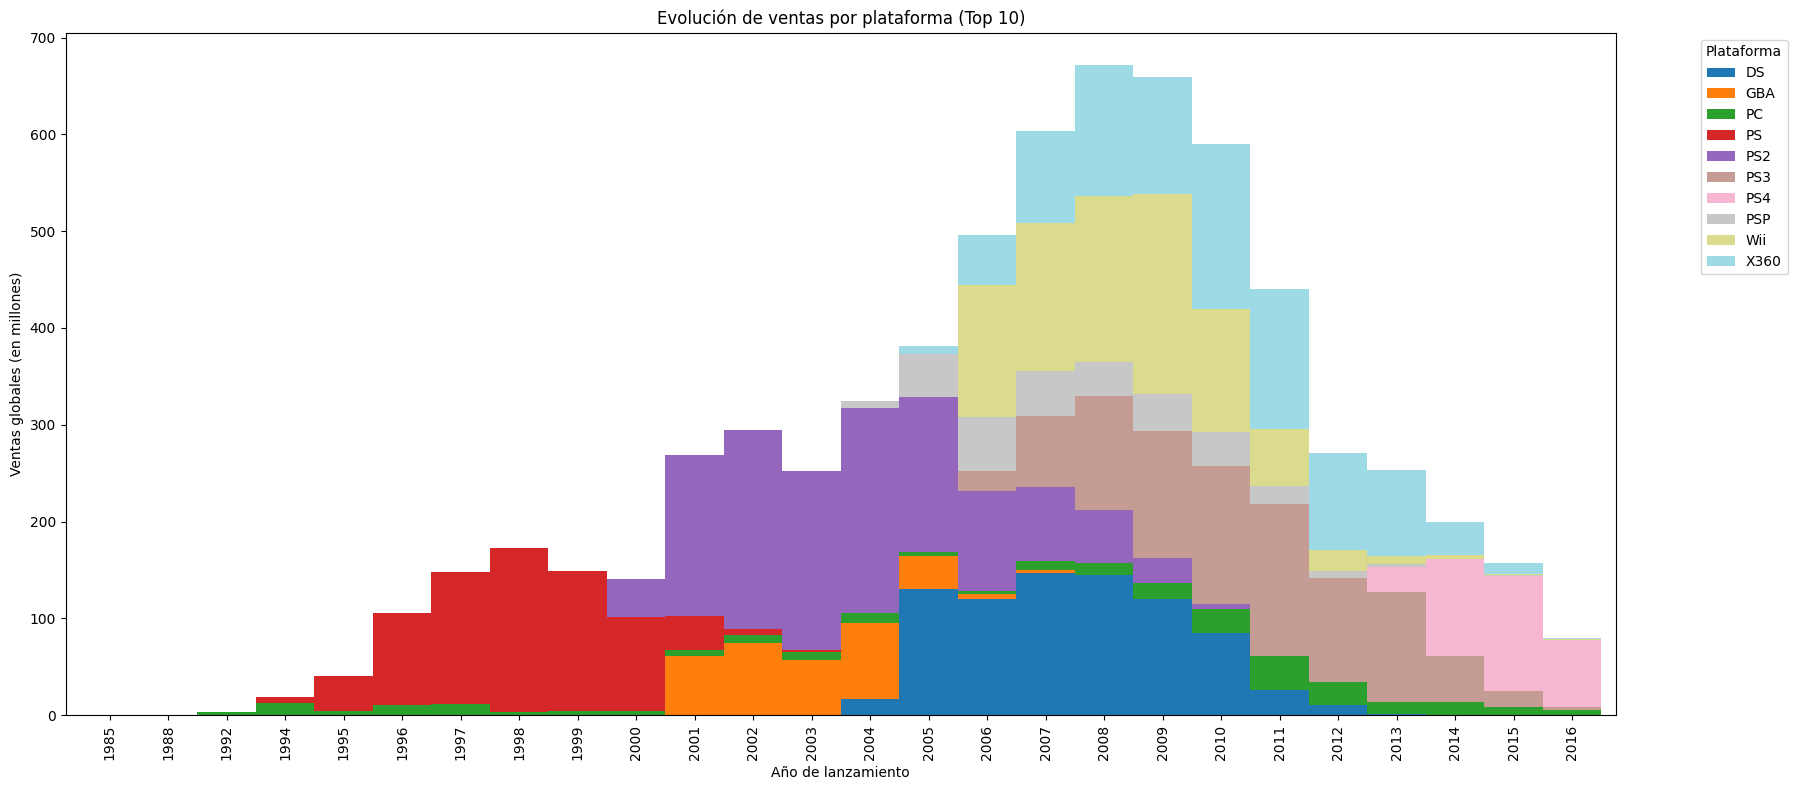

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Asegúrate de tener la columna de ventas globales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Paso 2: Top 10 plataformas con más ventas totales
top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 plataformas por ventas totales:\n", top_platforms)

# Paso 3: Filtrar datos solo de las plataformas top
games_top = games[games['platform'].isin(top_platforms.index)]

# Paso 4: Agrupar ventas por año y plataforma
sales_by_year_platform = games_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Paso 5: Gráfico de evolución de ventas por plataforma
plt.figure(figsize=(16, 8))
sales_by_year_platform.plot(kind='bar', stacked=True, width=1.0, colormap='tab20', figsize=(18, 8))
plt.title('Evolución de ventas por plataforma (Top 10)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
#Plataformas líderes en ventas totales (según el gráfico):
#1.PS2 (violeta): fue líder absoluto en su época (2001–2008 aprox).

#2.X360 (celeste) y PS3 (marrón claro): dominaron entre 2006 y 2012.

#3. Wii (amarillo): enorme impacto entre 2007 y 2011.

#4. DS (azul): otra de las plataformas con más ventas acumuladas.

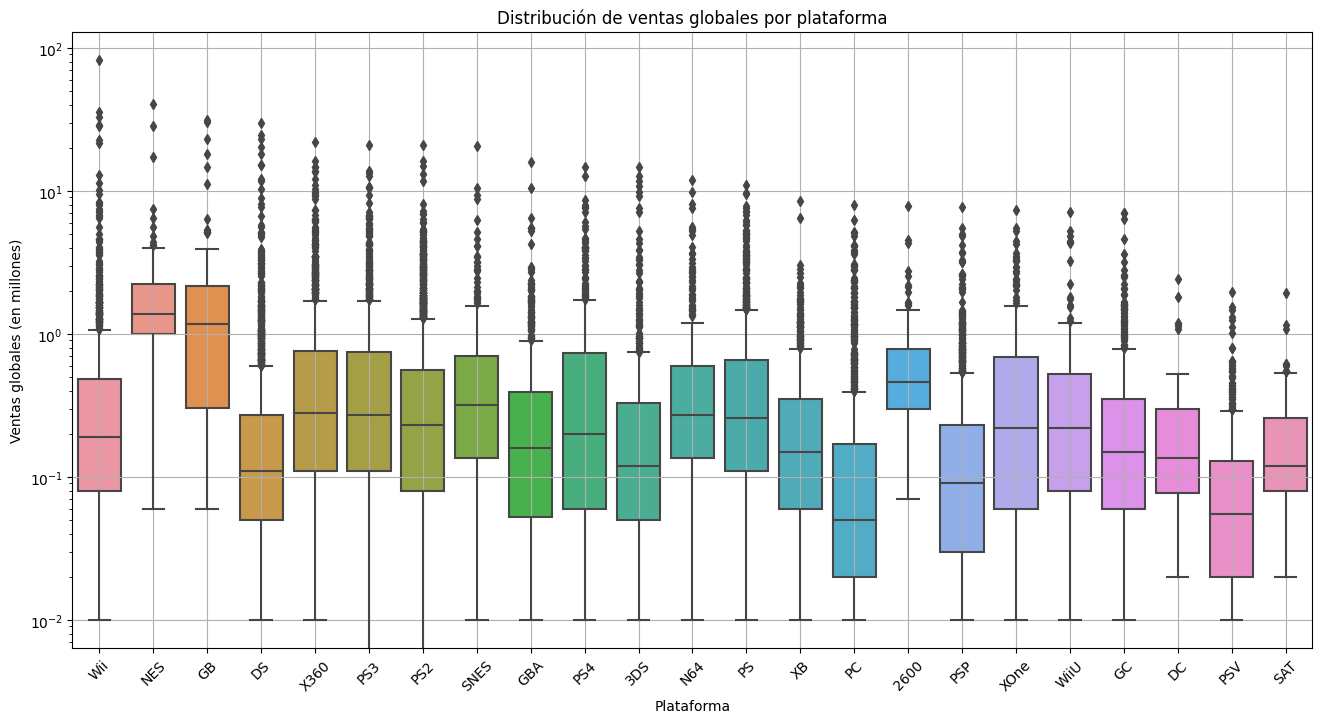

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una nueva columna de ventas globales
games['global_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Filtra plataformas con suficientes datos (mínimo 50 juegos)
platform_counts = games['platform'].value_counts()
platforms_to_keep = platform_counts[platform_counts >= 50].index
filtered_games = games[games['platform'].isin(platforms_to_keep)]

# Diagrama de caja
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_games, x='platform', y='global_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.yscale('log')  # escala logarítmica para manejar valores extremos
plt.grid(True)
plt.show()


In [15]:
#Algunas plataformas como Wii, NES y GB (Game Boy) presentan una mediana de ventas notablemente más alta que otras.

#Muchas otras plataformas tienen ventas concentradas en valores bajos, pero con outliers (valores atípicos) muy altos que elevan el rango.

#Las plataformas con ventas promedio más altas y menor dispersión podrían considerarse más estables y rentables.

#Otras como PC, aunque con mediana baja, podrían esconder juegos con altísimas ventas (como se ve por sus outliers), y podrían ser rentables si se apunta a títulos estrella.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, realizaste análisis super detallados de cada gráfica y cálculo realizado, buen trabajo! Mantén siempre la buena práctica de redactar interpretaciones de las gráficas para facilitar la comprensión del proceso de análisis
</div>

Correlación entre User_Score y Global_Sales: 0.11
Correlación entre Critic_Score y Global_Sales: 0.39


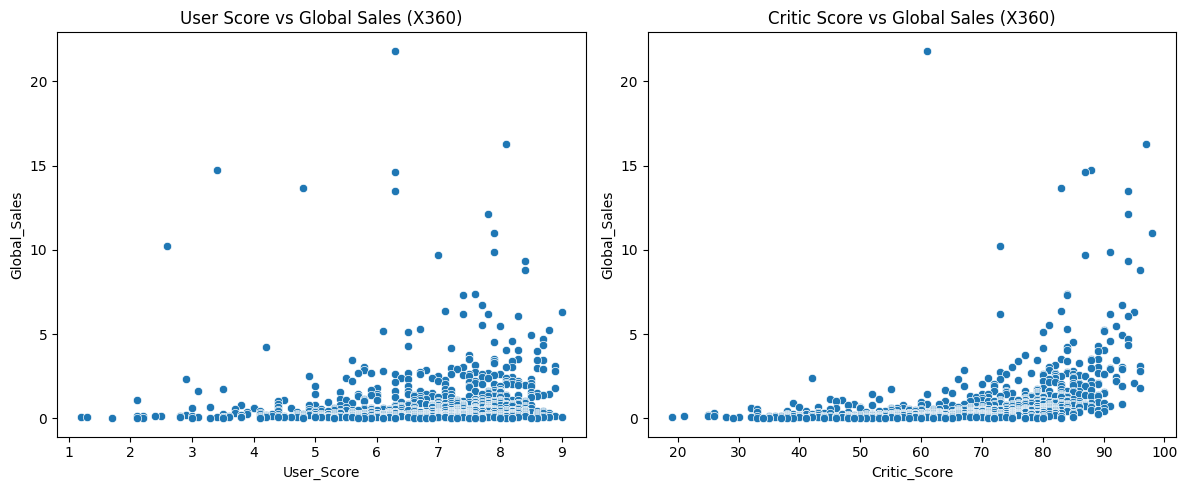

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna de ventas globales
df['Global_Sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']

# Filtrar para la plataforma X360
x360 = df[df['Platform'] == 'X360']

# Asegurar que los valores de 'User_Score' son numéricos (algunos pueden venir como 'tbd' u otro texto)
x360 = x360[x360['User_Score'] != 'tbd']
x360['User_Score'] = pd.to_numeric(x360['User_Score'], errors='coerce')

# Eliminar filas con valores faltantes
x360 = x360[['User_Score', 'Critic_Score', 'Global_Sales']].dropna()

# Calcular correlaciones
corr_user = x360['User_Score'].corr(x360['Global_Sales'])
corr_critic = x360['Critic_Score'].corr(x360['Global_Sales'])

print(f"Correlación entre User_Score y Global_Sales: {corr_user:.2f}")
print(f"Correlación entre Critic_Score y Global_Sales: {corr_critic:.2f}")

# Gráfico de dispersión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=x360, x='User_Score', y='Global_Sales')
plt.title('User Score vs Global Sales (X360)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=x360, x='Critic_Score', y='Global_Sales')
plt.title('Critic Score vs Global Sales (X360)')

plt.tight_layout()
plt.show()


In [22]:
#1.Las reseñas de críticos parecen tener una influencia moderada en las ventas de juegos de X360.

#2.Las reseñas de usuarios tienen una influencia mucho menor.

#3.Aun así, ni las críticas ni las puntuaciones de usuarios explican completamente las ventas, por lo que sería útil explorar otras variables: género, año de lanzamiento, franquicia, presupuesto, etc.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las correlaciones entre las diferentes variables, siempre es importante revisar que puede estar afectando a otro punto del análisis
</div>

                              Name Platform  NA_sales  EU_sales  JP_sales  \
16              Grand Theft Auto V      PS3      7.02      9.09      0.98   
17   Grand Theft Auto: San Andreas      PS2      9.43      0.40      0.41   
23              Grand Theft Auto V     X360      9.66      5.14      0.06   
29  Call of Duty: Modern Warfare 3     X360      9.04      4.24      0.13   
31       Call of Duty: Black Ops 3      PS4      6.03      5.86      0.36   

    Other_sales  Global_Sales  
16         3.96         21.05  
17        10.57         20.81  
23         1.41         16.27  
29         1.32         14.73  
31         2.38         14.63  


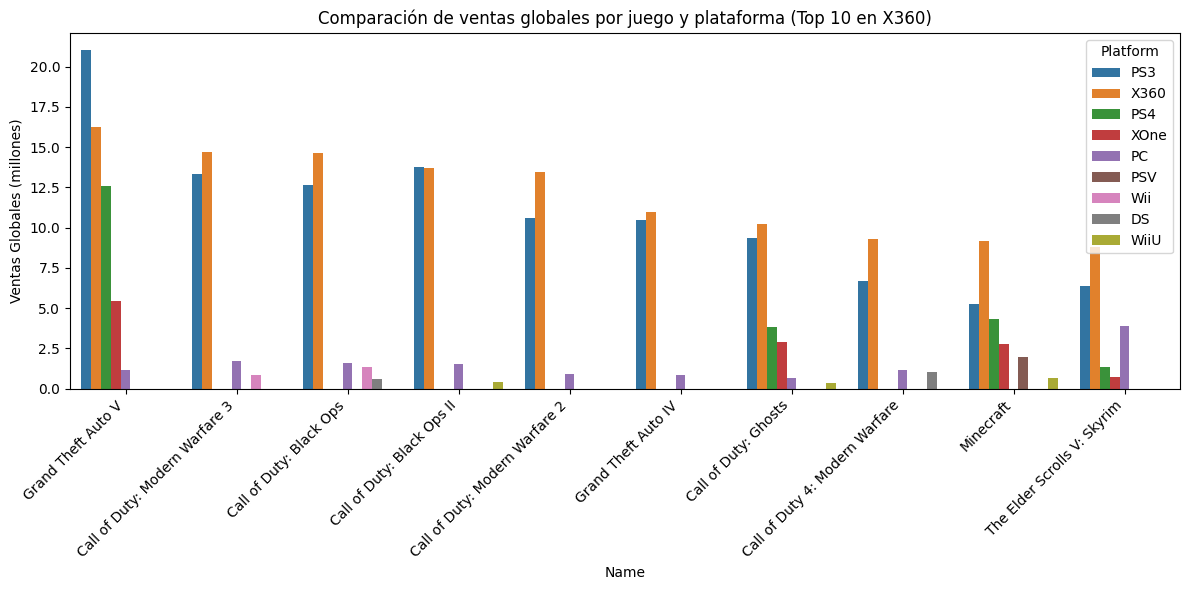

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/datasets/games.csv')  # Cambia por el nombre real si es necesario

# Asegurarse de que los nombres de columnas estén limpios
df.columns = df.columns.str.strip()

# Crear una tabla solo con columnas relevantes
ventas = df[['Name', 'Platform', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].copy()

# Calcular ventas globales
ventas['Global_Sales'] = ventas[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

# Filtrar juegos que están en múltiples plataformas
multiplataforma = ventas.groupby('Name').filter(lambda x: x['Platform'].nunique() > 1)

# Filtrar solo los juegos que incluyen X360
con_x360 = multiplataforma.groupby('Name').filter(lambda x: 'X360' in x['Platform'].values)

# Mostrar algunas filas para verificar
print(con_x360.head())

# Elegir los 10 juegos más vendidos en X360 para hacer una comparación visual
top_x360_names = (
    con_x360[con_x360['Platform'] == 'X360']
    .sort_values('Global_Sales', ascending=False)
    .head(10)['Name']
)

# Filtrar las ventas de esos juegos en todas sus plataformas
top_multis = con_x360[con_x360['Name'].isin(top_x360_names)]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_multis, x='Name', y='Global_Sales', hue='Platform')
plt.title('Comparación de ventas globales por juego y plataforma (Top 10 en X360)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas Globales (millones)')
plt.tight_layout()
plt.show()


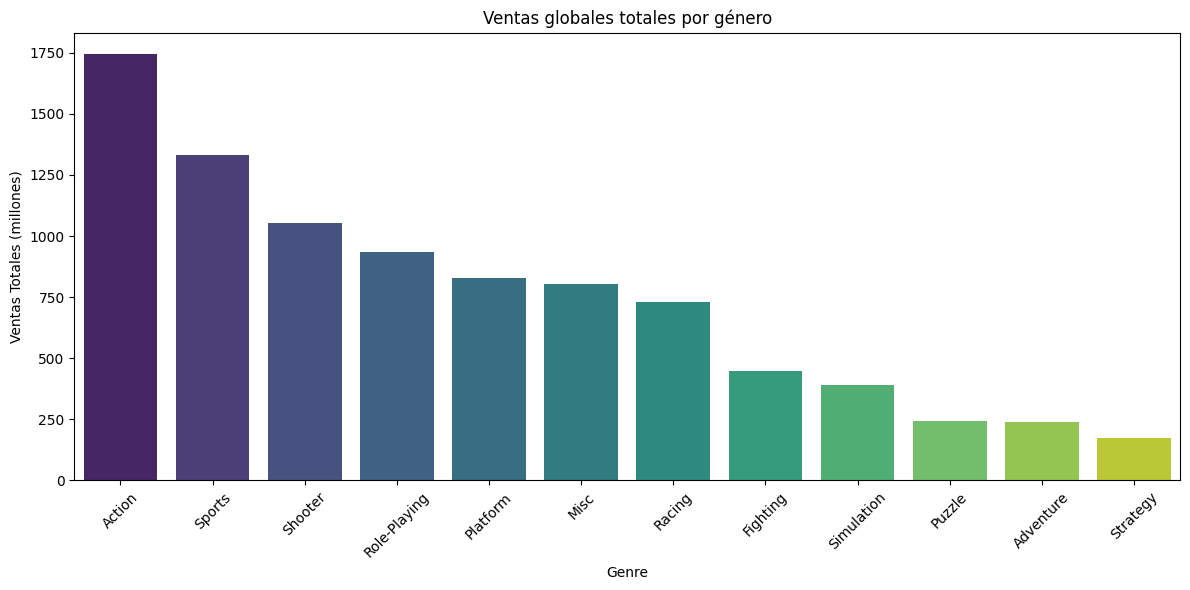

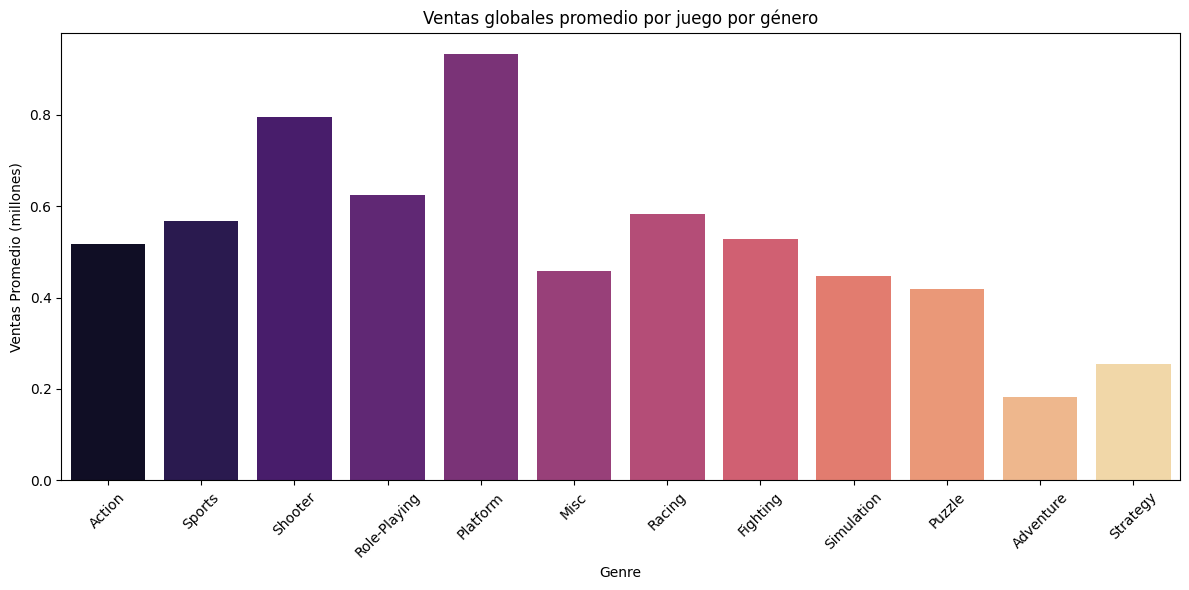

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (ajusta el nombre si es necesario)
df = pd.read_csv('/datasets/games.csv')

# Asegurarse de que las columnas estén limpias
df.columns = df.columns.str.strip()

# Calcular ventas globales
df['Global_Sales'] = df[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

# Conteo de juegos por género
conteo_genero = df['Genre'].value_counts()

# Ventas totales y promedio por género
ventas_por_genero = df.groupby('Genre')['Global_Sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)

# Gráfico: Total de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_genero.reset_index(), x='Genre', y='sum', palette='viridis')
plt.title('Ventas globales totales por género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico: Ventas promedio por juego en cada género
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_genero.reset_index(), x='Genre', y='mean', palette='magma')
plt.title('Ventas globales promedio por juego por género')
plt.ylabel('Ventas Promedio (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
#1.Géneros como Action tienen muchas ventas totales por volumen de juegos, pero su promedio por título no es tan alto.

#2.Géneros como Platform y Shooter logran mejores ventas por título individual.

#3. Menor interés comercial en ciertos géneros:
#Adventure, Puzzle y Strategy podrían no ser tan atractivos comercialmente, tanto por volumen como por ventas individuales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo analizando las ventas por plataforma y por género, tratándose de videojuegos, analizarlo de esta forma da muy buenos detalles en tu análisis
</div>

In [27]:
import pandas as pd

# Agrupar ventas por plataforma en cada región
na_sales = df.groupby('Platform')['NA_sales'].sum().sort_values(ascending=False)
eu_sales = df.groupby('Platform')['EU_sales'].sum().sort_values(ascending=False)
jp_sales = df.groupby('Platform')['JP_sales'].sum().sort_values(ascending=False)

# Obtener las 5 principales plataformas por región
top5_na = na_sales.head(5)
top5_eu = eu_sales.head(5)
top5_jp = jp_sales.head(5)

# Calcular cuota de mercado (porcentaje) en cada región
total_na = na_sales.sum()
total_eu = eu_sales.sum()
total_jp = jp_sales.sum()

top5_na_percent = (top5_na / total_na) * 100
top5_eu_percent = (top5_eu / total_eu) * 100
top5_jp_percent = (top5_jp / total_jp) * 100

print("Top 5 plataformas en NA con cuota de mercado (%)")
print(top5_na_percent)

print("\nTop 5 plataformas en EU con cuota de mercado (%)")
print(top5_eu_percent)

print("\nTop 5 plataformas en JP con cuota de mercado (%)")
print(top5_jp_percent)

# Comparación básica entre regiones para plataformas que aparecen en al menos una top 5
all_top_platforms = set(top5_na.index) | set(top5_eu.index) | set(top5_jp.index)

comparison = pd.DataFrame({
    'NA (%)': top5_na_percent.reindex(all_top_platforms).fillna(0),
    'EU (%)': top5_eu_percent.reindex(all_top_platforms).fillna(0),
    'JP (%)': top5_jp_percent.reindex(all_top_platforms).fillna(0),
})

print("\nComparación de cuotas de mercado por región para las principales plataformas:")
print(comparison)


Top 5 plataformas en NA con cuota de mercado (%)
Platform
X360    13.685191
PS2     13.262008
Wii     11.287153
PS3      8.938181
DS       8.686270
Name: NA_sales, dtype: float64

Top 5 plataformas en EU con cuota de mercado (%)
Platform
PS2     13.993244
PS3     13.622060
X360    11.166880
Wii     10.814255
PS       8.809859
Name: EU_sales, dtype: float64

Top 5 plataformas en JP con cuota de mercado (%)
Platform
DS      13.532762
PS      10.777188
PS2     10.729399
SNES     8.983559
3DS      7.759544
Name: JP_sales, dtype: float64

Comparación de cuotas de mercado por región para las principales plataformas:
             NA (%)     EU (%)     JP (%)
Platform                                 
X360      13.685191  11.166880   0.000000
SNES       0.000000   0.000000   8.983559
PS2       13.262008  13.993244  10.729399
PS3        8.938181  13.622060   0.000000
3DS        0.000000   0.000000   7.759544
DS         8.686270   0.000000  13.532762
Wii       11.287153  10.814255   0.000000
PS  

In [28]:
#1. Mercados NA y EU tienen muchas plataformas similares en su top 5, con X360, PS2, PS3 y Wii dominando, mostrando gustos similares en estos mercados occidentales.

#2. Japón tiene un mercado claramente diferente, con plataformas portátiles como DS y 3DS y consolas Sony clásicas como PS y SNES siendo más fuertes, mientras que X360 y PS3 no tienen presencia importante.

#3. Esto refleja cómo la cultura, los gustos y la historia de la industria influyen en las ventas y la popularidad de las plataformas según la región.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, este análisis es importante, siempre hay que crear perfiles de usuario para entender cómo usan el producto que se está analizando
</div>

In [29]:
# Agrupar y sumar ventas por género en cada región
top5_na = df.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
top5_eu = df.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
top5_jp = df.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA:\n", top5_na)
print("\nTop 5 géneros en EU:\n", top5_eu)
print("\nTop 5 géneros en JP:\n", top5_jp)


Top 5 géneros en NA:
 Genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: NA_sales, dtype: float64

Top 5 géneros en EU:
 Genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: EU_sales, dtype: float64

Top 5 géneros en JP:
 Genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: JP_sales, dtype: float64


In [30]:
#1.Los mercados occidentales (NA y EU) prefieren géneros orientados a la acción rápida y competitiva, mientras que Japón prefiere juegos más narrativos y estratégicos como los RPG.

#2. Esta diferencia refleja las distintas culturas y gustos en videojuegos, que afectan cómo las empresas diseñan y comercializan sus juegos en cada región.

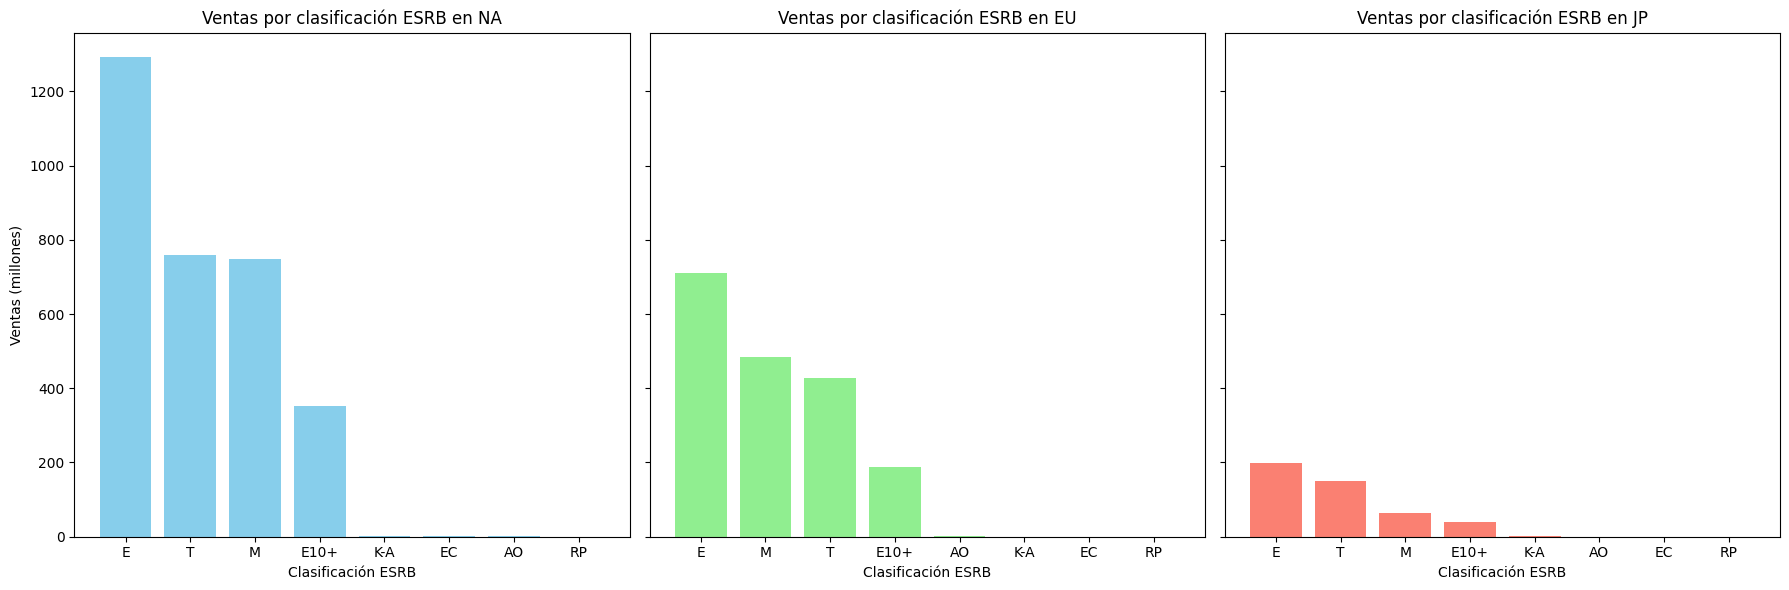

In [35]:
import matplotlib.pyplot as plt

# Eliminar filas sin clasificación ESRB
df_clean = df.dropna(subset=['Rating'])

# Agrupar ventas por clasificación para cada región
rating_na = df_clean.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)
rating_eu = df_clean.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)
rating_jp = df_clean.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False)

# Crear gráficos de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Norteamérica
axes[0].bar(rating_na.index, rating_na.values, color='skyblue')
axes[0].set_title('Ventas por clasificación ESRB en NA')
axes[0].set_ylabel('Ventas (millones)')
axes[0].set_xlabel('Clasificación ESRB')

# Europa
axes[1].bar(rating_eu.index, rating_eu.values, color='lightgreen')
axes[1].set_title('Ventas por clasificación ESRB en EU')
axes[1].set_xlabel('Clasificación ESRB')

# Japón
axes[2].bar(rating_jp.index, rating_jp.values, color='salmon')
axes[2].set_title('Ventas por clasificación ESRB en JP')
axes[2].set_xlabel('Clasificación ESRB')

plt.tight_layout()
plt.show()


In [ ]:
#1. En NA y EU: los juegos con clasificación 'E' (Everyone) y 'T' (Teen) dominan las ventas. Asi como los títulos 'M' (Mature) tengan una presencia importante.

#2. En JP: La clasificación ESRB tiene menos influencia directa, ya que Japón usa su propio sistema (CERO).


In [4]:
 #1. Comparación de plataformas: Xbox One vs. PC

import pandas as pd
from scipy import stats

#H₀ (nula): Las calificaciones promedio de los usuarios en Xbox One y PC son iguales.

#H₁ (alternativa): Las calificaciones promedio son diferentes.

alpha = 0.05

df = pd.read_csv('/datasets/games.csv')

df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Filtrar datos
xone_scores = df[(df['Platform'] == 'XOne') & (df['User_Score'].notna())]['User_Score']
pc_scores = df[(df['Platform'] == 'PC') & (df['User_Score'].notna())]['User_Score']

# Prueba de hipótesis: t de Student
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Evaluación de la hipótesis
if p_value < alpha:
    print("Rechazamos H₀: Las calificaciones promedio SON DIFERENTES.")
else:
    print("No podemos rechazar H₀: No hay evidencia de diferencia.")


T-statistic: -4.6534, p-value: 0.0000
Rechazamos H₀: Las calificaciones promedio SON DIFERENTES.


In [5]:
 #2. Comparación de géneros: Acción vs. Deportes

#H₀ (nula): Las calificaciones promedio de los usuarios en juegos de Acción y Deportes son iguales.

#H₁ (alternativa): Las calificaciones promedio son diferentes.

# Filtrar datos
action_scores = df[(df['Genre'] == 'Action') & (df['User_Score'].notna())]['User_Score']
sports_scores = df[(df['Genre'] == 'Sports') & (df['User_Score'].notna())]['User_Score']

# Prueba de hipótesis: t de Student
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Evaluación de la hipótesis
if p_value < alpha:
    print("Rechazamos H₀: Las calificaciones promedio SON DIFERENTES.")
else:
    print("No podemos rechazar H₀: No hay evidencia de diferencia.")


T-statistic: 1.5775, p-value: 0.1148
No podemos rechazar H₀: No hay evidencia de diferencia.


In [ ]:
#1. Se utilizó la prueba t de Student para muestras independientes (ttest_ind de scipy.stats), con equal_var=False porque no asumimos que ambas plataformas tienen la misma varianza (uso de la variante de Welch).

#2. Elegimos un nivel de significancia α = 0.05 (5%).
#Esto significa que aceptamos un 5% de probabilidad de cometer un error tipo I 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada las pruebas estadísticas para revisar las diferencias. Es importante comprobar esto de manera matemática para tener una mayor seguridad de que las diferencias vistas no es algo aleatorio.
</div>

## Conclusión general:

1. Comparación entre plataformas (Xbox One vs. PC)
El valor p fue menor que 0.05 (p = 0.0000).

Conclusión: Existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para juegos en Xbox One y PC.

En otras palabras, los usuarios valoran los juegos de forma diferente según la plataforma.

2. Comparación entre géneros (Acción vs. Deportes)
El valor p fue mayor que 0.05 (p = 0.1148).

Conclusión: No hay suficiente evidencia para afirmar que las calificaciones promedio de los géneros Acción y Deportes son diferentes.

Es decir, las valoraciones de los usuarios son similares entre estos dos géneros, al menos desde un punto de vista estadístico.



<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Recomendación adicional, es que utilices celdas de tipo Markdown para redactar tus comentarios y no celdas tipo código ya que si olvidas comentar algo vas a causar errores de ejecución
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el proyecto realizado, tienes un notebook con buena presentación y los análisis están correctamente redactados en cada parte del proyecto. Te felicito por la excelente presentación que le has dado a tu notebook, es importante que nuestros proyectos queden claros y legibles porque a menudo se deben compartir entre compañeros de equipo.
 
    
    Saludos!
</div>